In [2]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


# Problem Statement

Construct a linear regression model that predicts the duration of sleep given the time engaged in physical activity (in minutes), stress-level experienced (between 1-10), and self-reported quality of sleep (between 1-10) for 374 people.

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | duration of sleep | dependent variable | $T$ | hours |
| $\beta_0$ | regression coefficient for sleep duration | parameter | $T$ | hours |
| $X_1$ | time engaged in physical activity during the day | independent variable | $T$ | minutes |
| $\beta_1$ | regression coefficient for physical activity | parameter | $T$ | minutes |
| $X_2$ | self-reported stress level experienced (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_2$ | regression coefficient for stress level | parameter | 1 | unitless |
| $X_3$ | self-reported quality of sleep (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_3$ | regression coefficient for quality of sleep | parameter | 1 | unitless |
| $\epsilon$ | residual error | parameter | $T$ | hours |

# Assumptions and Constraints

- The subjective formulation of a score from 1 to 10 for stress experienced and quality of sleep is uniform across all participants
- Participants are assumed to report their sleep times and subjective scores truthfully and without bias.
- The sample is assumed to represent the general population to which the model will be applied.
- Sleep duration is assumed to be influenced only by the variables included in the model, no additional variables affect it.
- The relationship between sleep duration and the predictors is assumed to be linear.
- The explanatory variables are assumed to be linearly independent.
- The model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$
- The average value of the error is 0: i.e, $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- The variance of the error is constant: i.e, $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\epsilon$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$

# Building the Solution

The linear regression model is defined as $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

We first fit a baseline linear regression model using statsmodels.api to understand how well the raw data satisfies the 3 core assumptions of linear regression and to diagnose any other structural issues in the untransformed data. Below is our analysis of that model.

In [3]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)
sleep.head()

,Duration,Quality,Physical_Activity,Stress
0,6.1,6,42,6
1,6.2,6,60,8
2,6.2,6,60,8
3,5.9,4,30,8
4,5.9,4,30,8


## Untransformed Model

In [4]:
X = sleep[['Physical_Activity','Quality','Stress']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          4.13e-123
Time:                        01:42:03   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

**Observations from the Summary Table:**

Upon building the linear regression model with no feature transformation, we now analyze the summary information. The first piece of information of note is that there is a warning that the condition number is large. We know from class that this indicates there might be linearly dependent features. Additionally the $R^2$ and $R^2_{adj}$ are both relatively high and this indicates that most of the variance in the target variable (sleep duration) can be explained by the features of the model which is good. Finally we see that the regression coefficient value for physical activity is near $0$, this could indicate that either physical activity is not a good predictor of our target variable or that the physical activity is not on the same scale as the rest of the data. From these facts alone it is not enough to conclude wherther or not this is a good linear model, to futher assess its validity, we now examine whether the three core assumptions of linear regression are satisfied.

In [5]:
print(reg.params)

const                3.673707
Physical_Activity    0.002414
Quality              0.498098
Stress              -0.060716
dtype: float64


### Assumption: Average value of the errors is zero.

The regression plots are used to evaluate if the first assumption of linear regression is satisfied or not, namely the average value of the error is 0 ($\mathbb{E}(\epsilon_i) = 0, ∀ i$).

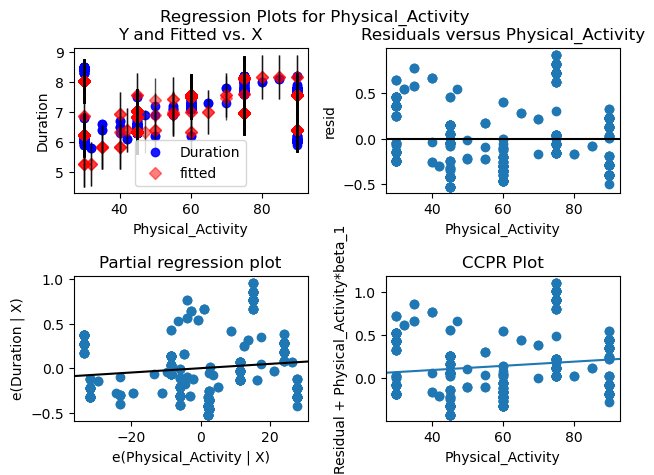

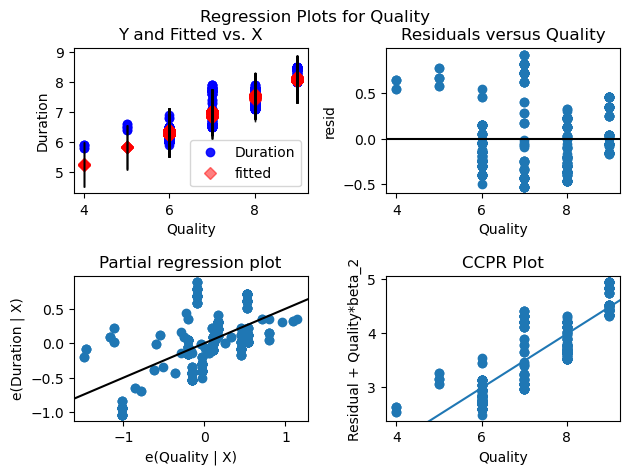

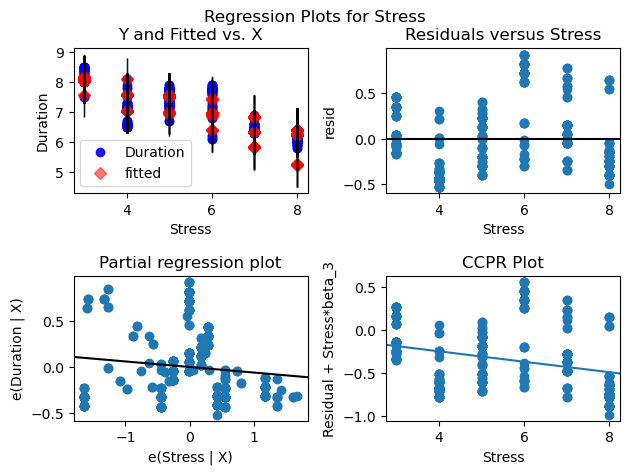

In [6]:
sm.graphics.plot_regress_exog(reg,'Physical_Activity')
plt.show()

sm.graphics.plot_regress_exog(reg,'Quality')
plt.show()

sm.graphics.plot_regress_exog(reg,'Stress')
plt.show()

**Residual Plots:**
Starting with the analysis of the plot, residuals vs physical activity. We noticed the data violates the condition of being evenly distributed over the $y = 0$ line(with the possible exception of Physical Activity = 90). Next when we looked at residuals vs quality we again noticed some columns of data points not being evenly spread across the $y=0$ line, however this violation wasn't as extreme as in the physical activity plot. Finally we looked at residuals vs stress, we determined this plot actually did satisfy the condition of being evenly distributed over the horizontal axis as needed. However, with two out of the three variables not satisfying the needed condition, we conclude that the residual plots do not satisfy the condition of being evenly distributed over the horizontal axis.

**Partial Regression Plots:**
Because the variables take on integer values(from the responses to the survey), the scatter plots show vertical columns of points. This makes it harder to judge whether the covariates exhibit a linear trend, but the overall pattern is still relatively clear. The two covariates that best exhibit a linear trend are "Quality" and the constant term, though even these relations are still pretty weak.  We've concluded that the two covariates namely "Physical_Activity" and "Stress" don't follow a linear trend. Thus with two out of four of the plots being flat out not a linear trend and the other two being somewhat inconclusive we've determined that we have violated this condition as well.

**Conclusion:** Since in both cases we have violated our conditions needed for the average value of the error's is 0. Therefore, applying linear regression to the untransformed data violates the first assumption of linear regression.

### Assumption: Variance of errors is constant.

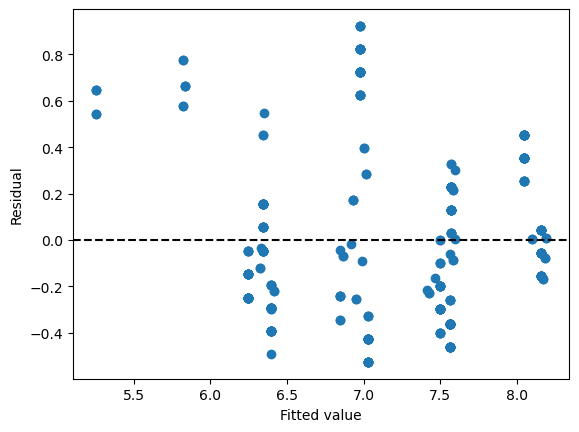

In [7]:
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

We know that if the residuals vs fitted y's produce a plot that's a random scatter about horizontal axis, then we've satisfied the second assumption of linear regression. Namely that the variance of the error is constant ($Var(\epsilon_i) = \sigma^2,~\forall i$). From our analysis of the plot we observe a clustering of data below the horizontal axis  around fitted values of approximately 6.25 to 7.5, and the overall spread of the residuals is too narrow. This non random structure indicates that the variance is not constant, thus  violating the variance of errors is a constant assumption.

### Assumption: Errors are normally distributed.

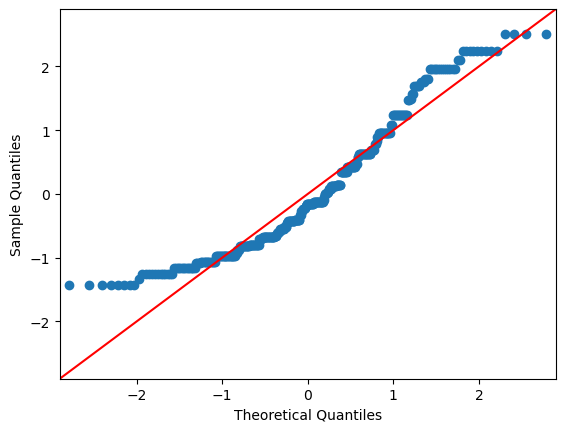

In [8]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

We know that if we plot our residuals vs a normal distribution and our points lie along the line $y=x$, then we have satisfied the third assumption of linear regression. Namely that the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$. We observe that the residuals do not lie on the $y=x$ line but instead they seem to lie on a tilted parabola instead. Hence we conclude that we have violated the third assumption of linear regression as well.

**Overall:** The untransformed data fails to meet the assumptions required for a valid linear regression model. As a result, we proceed to transforming the data in search of model that satisfies the three assumptions of linear regression.

## Transformed Model

### Taking the square of the Quality values

In [9]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity'] = (sleepTransformed['Physical_Activity'])**2
sleepTransformed['Quality'] = (sleepTransformed['Quality'])**2
sleepTransformed['Stress'] = (sleepTransformed['Stress'])**2
sleepTransformed['Duration'] = np.log(sleepTransformed['Duration'])
X_transformed = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y_transformed = sleepTransformed['Duration']
X_transformed = sm.add_constant(X_transformed)
reg_transformed = sm.OLS(Y_transformed, X_transformed).fit()
print(reg_transformed.rsquared_adj)

0.8047269776324298


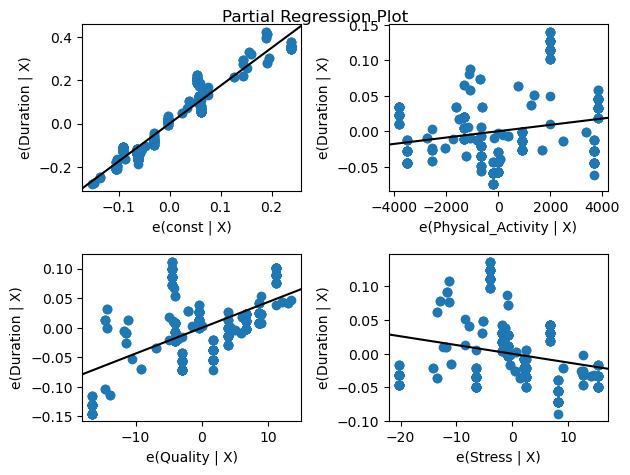

In [10]:
# Plot 1 (Partial Regression Plots)
sm.graphics.plot_partregress_grid(reg_transformed)
plt.show()

In [12]:
X = sleep[['Physical_Activity','Stress','Quality']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg_original = sm.OLS(Y, X).fit()

fitted_y_original = reg_original.fittedvalues
residuals_original = reg_original.resid

fitted_y_transformed = reg_transformed.fittedvalues
residuals_transformed = reg_transformed.resid

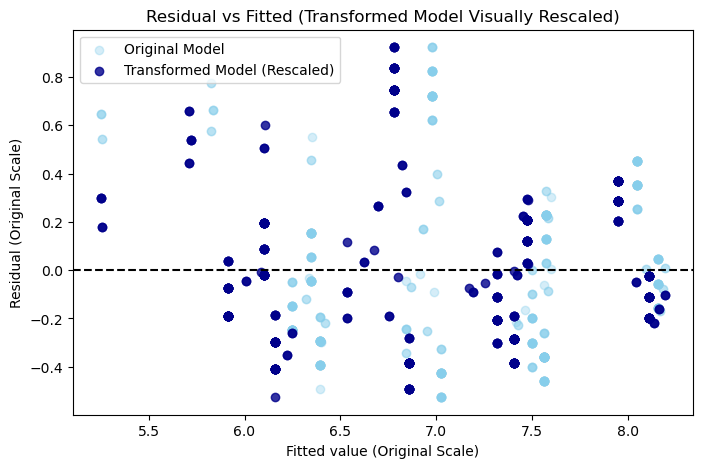

In [13]:
# Plot 2 (Residual-Fitted Value Plot)
def rescale_to_range(values, new_min, new_max):
    old_min, old_max = values.min(), values.max()
    return (values - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    
fitted_trans_scaled = rescale_to_range(fitted_y_transformed, fitted_y_original.min(), fitted_y_original.max())

residuals_trans_scaled = rescale_to_range(residuals_transformed, residuals_original.min(), residuals_original.max())

plt.figure(figsize=(8,5))

plt.scatter(fitted_y_original, residuals_original, color='skyblue', alpha=0.35, label='Original Model')

plt.scatter(fitted_trans_scaled, residuals_trans_scaled, color='darkblue', alpha=0.8, label='Transformed Model (Rescaled)')

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted value (Original Scale)")
plt.ylabel("Residual (Original Scale)")
plt.legend()
plt.title("Residual vs Fitted (Transformed Model Visually Rescaled)")
plt.show()

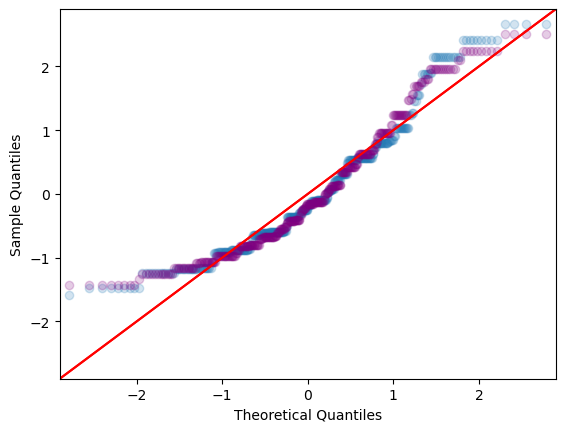

In [14]:
# Plot 4 (Overlapping QQplot)
residuals_original = reg_original.resid

fig, ax = plt.subplots()

sm.qqplot(residuals_transformed, fit = True, line='45', alpha = 0.2, ax=ax)
sm.qqplot(residuals_original, fit = True, line='45', markerfacecolor='purple', markeredgecolor='purple', alpha = 0.2, ax=ax)

plt.show()

# Analyze and Assess